In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Scraping

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
import requests
import time

from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
years = list(range(1981,2023))
print(years)

[1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


##MVP data

In [ ]:
# Scraping MVP data from the basketball-reference website and saving it to a file.

url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in years:
  url = url_start.format(year)
  data = requests.get(url)

  with open("/content/drive/MyDrive/Y3/AI/Project/scraping_data/mvps/{}.html".format(year), "w+") as f:
    f.write(data.text)

  time.sleep(1) 

In [ ]:
mvp_list = []

for year in years:
  with open ("/content/drive/MyDrive/Y3/AI/Project/scraping_data/mvps/{}.html".format(year)) as f:
    page = f.read() # Read in HTML data
  soup = BeautifulSoup(page, "html.parser") # Pass in the page string and use a parser -> create a parser class to extract table from the page
  soup.find('tr', class_="over_header").decompose() # Remove the over header from the table
  mvp_table = soup.find(id="mvp") # Returns the mvp table
  mvp = pd.read_html(str(mvp_table))[0] # Read the above table with pandas
  mvp["Year"] = year # Add a column at the end to know what year the data is from

  mvp_list.append(mvp) ## append all mvp tables in a list
  
mvps = pd.concat(mvp_list)

In [ ]:
mvps
mvps.to_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/mvps.csv")

## Players data

In [ ]:
player_url_start = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [ ]:
# Used a separate script (scraping_playerstats_script.py) to scrape players list + stats data. (Was giving errors in Jupyter Notebook)
# It was not possible to do the same as the MVP data as the player data loads with JavaScript.

In [ ]:
# from playwright.sync_api import sync_playwright

# years = list(range(1981,2023))
# url_start = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

# for year in years:
#   url = url_start.format(year)
  
#   with sync_playwright() as p:
#     browser = p.chromium.launch()
#     page = browser.new_page()
#     page.goto(url)
#     data = page.inner_html("*")
#     with open("players/{}.html".format(year), "w+", encoding='utf-8') as f:
#       f.write(data)
#     browser.close()

In [ ]:
players_list = []

for year in years:
  with open("/content/drive/MyDrive/Y3/AI/Project/scraping_data/players/{}.html".format(year)) as f:
    page = f.read()

  soup = BeautifulSoup(page, "html.parser")
  # soup.find('tr', class_="thead").decompose()
  for tr in soup.find_all('tr', class_="thead"):
    tr.decompose()
  players_table = soup.find(id="per_game_stats")
  players = pd.read_html(str(players_table))[0]
  players["Year"] = year
  players_list.append(players)

players = pd.concat(players_list)

In [ ]:
players
players.to_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/players.csv")

##Teams Data

In [ ]:
teams_standings_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

for year in years:
  url_teams = teams_standings_url.format(year)
  data = requests.get(url_teams)

  with open("/content/drive/MyDrive/Y3/AI/Project/scraping_data/teams/{}.html".format(year), "w+") as f:
    f.write(data.text)

  time.sleep(5)

In [ ]:
teams_list = []

for year in years:
  with open("/content/drive/MyDrive/Y3/AI/Project/scraping_data/teams/{}.html".format(year)) as f:
    page = f.read()

  soup = BeautifulSoup(page, "html.parser")
  for tr in soup.find_all('tr', class_="thead"):
    tr.decompose()
  teams_table = soup.find(id="div_divs_standings_E")
  team = pd.read_html(str(teams_table))[0]
  team["Year"] = year
  team["Team"] = team["Eastern Conference"]
  del team["Eastern Conference"]
  teams_list.append(team)

  soup = BeautifulSoup(page, "html.parser")
  for tr in soup.find_all('tr', class_="thead"):
    tr.decompose()
  teams_table = soup.find(id="div_divs_standings_W")
  team = pd.read_html(str(teams_table))[0]
  team["Year"] = year
  team["Team"] = team["Western Conference"]
  del team["Western Conference"]
  teams_list.append(team)
teams = pd.concat(teams_list)

In [ ]:
teams
teams.to_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/teams.csv")

#Data Cleaning



##MVPs Data

In [ ]:
mvps = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/mvps.csv")
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Julius Erving,30,PHI,28.0,454.0,690,0.658,82,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1981
1,1,2,Larry Bird,24,BOS,20.0,423.0,690,0.613,82,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,1981
2,2,3,Kareem Abdul-Jabbar,33,LAL,8.0,286.0,690,0.414,80,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,1981
3,3,4,Moses Malone,25,HOU,8.0,180.0,690,0.261,80,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,1981
4,4,5,George Gervin,28,SAS,1.0,83.0,690,0.120,82,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
684,8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
685,9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
686,10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


In [ ]:
# Getting rid of some columns, as they are present in the player data.
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Julius Erving,1981,454.0,690,0.658
1,Larry Bird,1981,423.0,690,0.613
2,Kareem Abdul-Jabbar,1981,286.0,690,0.414
3,Moses Malone,1981,180.0,690,0.261
4,George Gervin,1981,83.0,690,0.120


## Player Stats Data

In [ ]:
players = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/players.csv")
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Kareem Abdul-Jabbar*,C,33,LAL,80,NaN,37.2,10.5,...,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,1981
1,1,2,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981
2,2,2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,...,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,1981
3,3,2,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,...,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,1981
4,4,3,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,...,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22105,807,601,Thaddeus Young,PF,33,TOR,26,0.0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
22106,808,602,Trae Young,PG,23,ATL,76,76.0,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
22107,809,603,Omer Yurtseven,C,23,MIA,56,12.0,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
22108,810,604,Cody Zeller,C,29,POR,27,0.0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [ ]:
del players["Unnamed: 0"]
del players["Rk"]

In [ ]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,33,LAL,80,NaN,37.2,10.5,18.2,0.574,...,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,1981
1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,0.424,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981
2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,0.3,0.333,...,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,1981
3,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,1.9,0.429,...,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,1981
4,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,11.6,0.526,...,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,1981


In [ ]:
players["Player"].head()

0    Kareem Abdul-Jabbar*
1           Tom Abernethy
2           Tom Abernethy
3           Tom Abernethy
4             Alvan Adams
Name: Player, dtype: object

In [ ]:
# Some players have "*" after their name, this needs to be removed so I can merge the different data frames
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [ ]:
# Some players like Tom Abernerthy have duplicate names as they played for multiple teams in 1 year.
players.groupby(["Player", "Year"]).get_group(("Tom Abernethy", 1981))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,0.424,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981
2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,0.3,0.333,...,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,1981
3,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,1.9,0.429,...,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,1981


In [ ]:
# Only take TOT(AL) and replace "TOT" with the last team they played for.

def single_row(df):
  if df.shape[0]==1:
    return df
  else:
    row = df[df["Tm"] == "TOT" ]
    row["Tm"] = df.iloc[-1,:]["Tm"]
    return row

In [ ]:
players = players.groupby(["Player", "Year"]).apply(single_row)
players.head(20)

Player Pos  Age   Tm   G    GS    MP   FG  \
Player        Year                                                          
A.C. Green    1986 1945     A.C. Green  PF   22  LAL  82   1.0  18.8  2.5   
              1987 2329     A.C. Green  PF   23  LAL  79  72.0  28.4  4.0   
              1988 2715     A.C. Green  PF   24  LAL  82  64.0  32.1  3.9   
              1989 3149     A.C. Green  PF   25  LAL  82  82.0  30.6  4.9   
              1990 3594     A.C. Green  PF   26  LAL  82  82.0  33.0  4.7   
              1991 4071     A.C. Green  PF   27  LAL  82  21.0  26.4  3.1   
              1992 4521     A.C. Green  PF   28  LAL  82  53.0  35.4  4.7   
              1993 4963     A.C. Green  PF   29  LAL  82  55.0  34.4  4.6   
              1994 5431     A.C. Green  PF   30  PHO  82  55.0  34.5  5.7   
              1995 5900     A.C. Green  SF   31  PHO  82  52.0  32.8  3.8   
              1996 6377     A.C. Green  SF   32  PHO  82  36.0  25.8  2.6   
              1997 6932     A.C. Green  PF   33  DAL  83  73.0  30.0  2.8   
              1998 7498     A.C. Green  PF   34  DAL  82  68.0  32.3  3.0   
              1999 8036     A.C. Green  PF   35  DAL  50  35.0  18.5  2.2   
              2000 8544     A.C. Green  PF   36  LAL  82  82.0  23.5  2.1   
              2001 9043     A.C. Green  PF   37  MIA  82   1.0  17.2  1.8   
A.J. Bramlett 2000 8422  A.J. Bramlett   C   23  CLE   8   0.0   7.6  0.5   
A.J. English  1991 4035   A.J. English  SG   23  WSB  70  12.0  20.6  3.6   
              1992 4487   A.J. English  SG   24  WSB  81   6.0  20.6  4.5   
A.J. Guyton   2001 9046    A.J. Guyton  PG   22  CHI  33   8.0  19.1  2.4   

                          FGA    FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player        Year                    ...                                      
A.C. Green    1986 1945   4.7  0.539  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2   
              1987 2329   7.4  0.538  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3   
              1988 2715   7.8  0.503  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5   
              1989 3149   9.2  0.529  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5   
              1990 3594   9.8  0.478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4   
              1991 4071   6.6  0.476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
              1992 4521   9.8  0.476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
              1993 4963   8.6  0.537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
              1994 5431  11.3  0.502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
              1995 5900   7.5  0.504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
              1996 6377   5.4  0.484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0   
              1997 6932   5.8  0.483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9   
              1998 7498   6.5  0.453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8   
              1999 8036   5.1  0.422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4   
              2000 8544   4.7  0.447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6   
              2001 9043   4.0  0.444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5   
A.J. Bramlett 2000 8422   2.6  0.190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4   
A.J. English  1991 4035   8.2  0.439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6   
              1992 4487  10.4  0.433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1   
A.J. Guyton   2001 9046   5.8  0.406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7   

                          PF   PTS  Year  
Player        Year                        
A.C. Green    1986 1945  2.8   6.4  1986  
              1987 2329  2.2  10.8  1987  
              1988 2715  2.5  11.4  1988  
              1989 3149  2.1  13.3  1989  
              1990 3594  2.5  12.9  1990  
              1991 4071  1.4   9.1  1991  
              1992 4521  1.7  13.6  1992  
              1993 4963  1.8  12.8  1993  
              1994 5431  1.7  14.7  1994  
              1995 5900  1.8  11.2  1995  
              1996 6377  1.7   7.5  1996  
              199

In [ ]:
# The above code created a multilevel index, need to remove the duplicates

players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [ ]:
players[players["Player"] == "Tom Abernethy"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1,Tom Abernethy,SF,26,IND,39,NaN,7.6,0.6,1.5,0.424,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981


In [ ]:
players[players["Player"] == "Alex Caruso"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
18677,Alex Caruso,PG,23,LAL,37,7.0,15.2,1.4,3.1,0.431,...,0.4,1.4,1.8,2.0,0.6,0.3,1.1,1.4,3.6,2018
19354,Alex Caruso,PG,24,LAL,25,4.0,21.2,3.1,6.9,0.445,...,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2,2019
20056,Alex Caruso,PG,25,LAL,64,2.0,18.4,1.9,4.5,0.412,...,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5,2020
20713,Alex Caruso,PG,26,LAL,58,6.0,21.0,2.3,5.3,0.436,...,0.5,2.4,2.9,2.8,1.1,0.3,1.3,1.9,6.4,2021
21418,Alex Caruso,SG,27,CHI,41,18.0,28.0,2.5,6.2,0.398,...,0.8,2.8,3.6,4.0,1.7,0.4,1.4,2.6,7.4,2022


## Combining the PLAYER and MVP data

In [ ]:
# Outer merge on the player NAME and the YEAR (not all of the rows in the player columns are in the mvp column)

In [ ]:
merged = players.merge(mvps, how="outer", on=["Player", "Year"])

In [ ]:
merged.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,NaN,NaN,NaN
1,A.C. Green,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,NaN,NaN,NaN
2,A.C. Green,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,NaN,NaN,NaN
3,A.C. Green,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,NaN,NaN,NaN
4,A.C. Green,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN


In [ ]:
# Removing the NaN's (NaN's come if the player did not get any MVP votes)
merged[["Pts Won", "Pts Max", "Share"]] = merged[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [ ]:
merged.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0
1,A.C. Green,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0
2,A.C. Green,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0
3,A.C. Green,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0
4,A.C. Green,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0


## Teams Data + Combining with player-mvp

In [ ]:
teams = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/teams.csv")
teams

In [ ]:
# removing the "*" after the team names (teams that made the playoffs)
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [ ]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Milwaukee Bucks',
       'Chicago Bulls', 'Indiana Pacers', 'Atlanta Hawks',
       'Cleveland Cavaliers', 'Detroit Pistons', 'San Antonio Spurs',
       'Kansas City Kings', 'Houston Rockets', 'Denver Nuggets',
       'Utah Jazz', 'Dallas Mavericks', 'Phoenix Suns',
       'Los Angeles Lakers', 'Portland Trail Blazers',
       'Golden State Warriors', 'San Diego Clippers',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Minnesota Timberwolves', 'Toronto Raptors', 'Vancouver Grizzlies',
       'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans'],
      dtype=object)

In [ ]:
merged["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'SDC', 'NOP',
       'BRK', 'SAS', 'CHH', 'KCK', nan], dtype=object)

In [ ]:
# In order to be able to merge, team names need to be the same in both dfs.
# I created a csv with both the abbreviations and the full names.

In [ ]:
team_names = {}

with open("/content/drive/MyDrive/Y3/AI/Project/csvs/team_names.csv") as f:
  lines = f.readlines()
  for line in lines[1:]:
    abbrev,name = line.replace("\n", "").split(";")
    team_names[abbrev] = name

In [ ]:
merged["Team"] = merged["Tm"].map(team_names)

In [ ]:
merged.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers
5,A.C. Green,PF,27.0,LAL,82.0,21.0,26.4,3.1,6.6,0.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
6,A.C. Green,PF,28.0,LAL,82.0,53.0,35.4,4.7,9.8,0.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
7,A.C. Green,PF,29.0,LAL,82.0,55.0,34.4,4.6,8.6,0.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
8,A.C. Green,PF,30.0,PHO,82.0,55.0,34.5,5.7,11.3,0.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
9,A.C. Green,SF,31.0,PHO,82.0,52.0,32.8,3.8,7.5,0.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


In [ ]:
stats = merged.merge(teams, how="outer", on=["Team", "Year"])
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.000,Los Angeles Lakers,6.0,62.0,20.0,0.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.000,Los Angeles Lakers,6.0,62.0,20.0,0.756,—,117.3,109.5,6.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,0.009,Los Angeles Lakers,6.0,62.0,20.0,0.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.000,Los Angeles Lakers,6.0,62.0,20.0,0.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,0.173,Los Angeles Lakers,6.0,62.0,20.0,0.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,...,0.000,Milwaukee Bucks,6.0,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,...,0.000,Milwaukee Bucks,6.0,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,...,0.000,Milwaukee Bucks,6.0,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17958,Tony Snell,SG,25.0,MIL,80.0,80.0,29.2,3.1,6.8,0.455,...,0.000,Milwaukee Bucks,6.0,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [ ]:
del stats["Unnamed: 0"]

In [ ]:
# removed a bug in the last row
stats.drop(stats.index[-1], inplace=True)

In [ ]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [ ]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [ ]:
# Check why "GB" (Games Behind) is an object.
stats["GB"].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [ ]:
# Need to remove the "-"
stats["GB"] = stats["GB"].str.replace("—", "0")
stats["GB"] = pd.to_numeric(stats["GB"])

In [ ]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [ ]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [ ]:
# Final dataset
stats.to_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/player_mvp_stats.csv")

# Data Visualisation

In [ ]:
v_stats = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/player_mvp_stats.csv")
del v_stats["Unnamed: 0"]
v_stats.dropna()
v_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [ ]:
import matplotlib.pyplot as plt

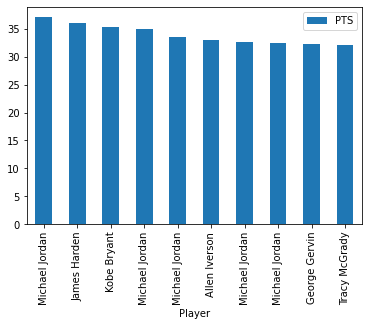

In [ ]:
highest_scoring = v_stats[v_stats["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring.plot.bar("Player", "PTS")

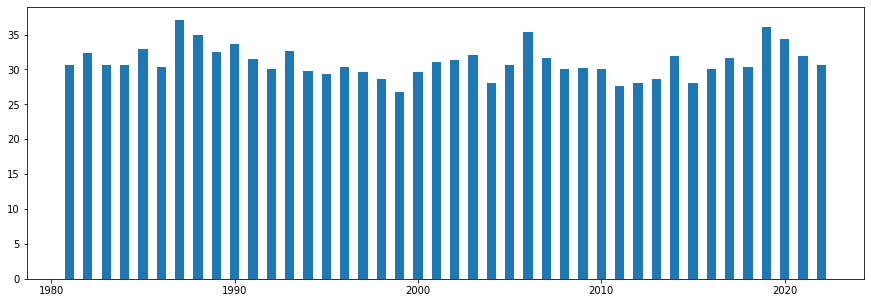

In [ ]:
highest_scoring = v_stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

plt.figure(figsize=(15, 5))
plt.bar(highest_scoring["Year"], highest_scoring["PTS"], width=0.5)
plt.show()

In [ ]:
v_stats.corr()["Share"]

Age        0.018899
G          0.091226
GS         0.173228
MP         0.170009
FG         0.278887
FGA        0.252946
FG%        0.070495
3P         0.081697
3PA        0.082292
3P%        0.011483
2P         0.276551
2PA        0.253351
2P%        0.066255
eFG%       0.063180
FT         0.323143
FTA        0.323033
FT%        0.046388
ORB        0.122276
DRB        0.222652
TRB        0.199610
AST        0.205069
STL        0.186410
BLK        0.151949
TOV        0.237048
PF         0.074689
PTS        0.292717
Year      -0.016578
Pts Won    0.985668
Pts Max    0.515527
Share      1.000000
W          0.126793
L         -0.125219
W/L%       0.129477
GB        -0.105084
PS/G       0.046314
PA/G      -0.032911
SRS        0.123575
Name: Share, dtype: float64

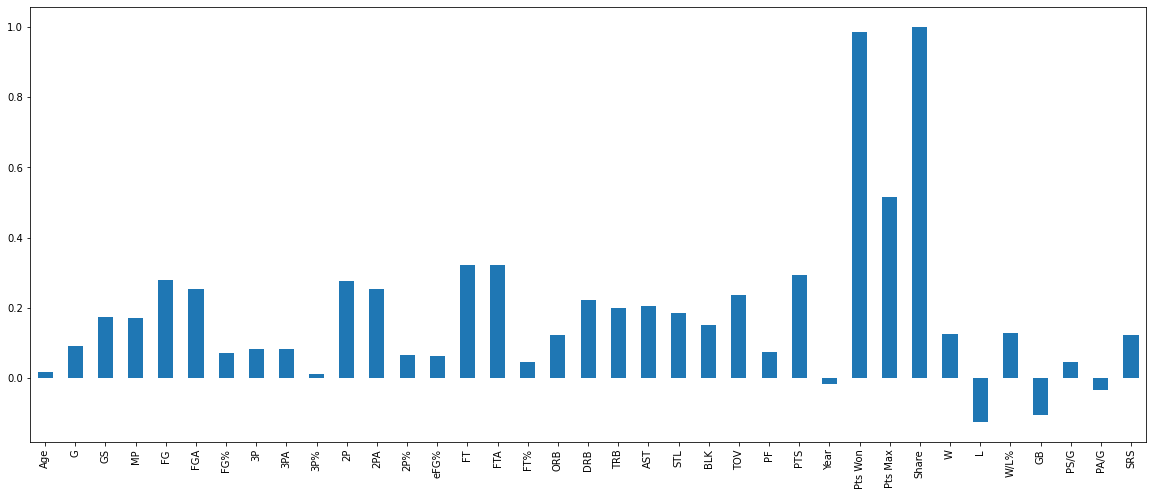

In [ ]:
plt.figure(figsize=(20, 8))
v_stats.corr()["Share"].plot.bar()
plt.show()

The "Share" feature in my dataset represents the percentage of MVP votes received by a player. It is calculated by dividing the number of MVP votes received by the player (Pts Won) by the maximum number of MVP votes that a player could receive (Pts Max).

For example, if a player received 100 MVP votes and the maximum number of MVP votes that a player could receive was 500, then the player's "Share" would be 0.2, or 20%.

Features that have a relatively strong positive correlation with "Share" include: "FG%", "2P%", "FT%", "AST", "STL", "BLK", "TOV", and "PF".

This suggests that players who have a high field goal percentage, two-point percentage, free throw percentage, assist per game, steal per game, block per game, turnover per game, and personal foul per game tend to receive more MVP votes.

On the other hand, some features that have a relatively weak or no correlation with "Share" include: "Age", "3P%", "eFG%", "ORB", "DRB", "TRB", "W", "L, "W/L%", "GB", "PS/G", and "PA/G".

This suggests that these features may not be as important in predicting the share of MVP votes.

# Neural Network Algorithms

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/player_mvp_stats.csv")
data

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,17954,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17955,17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17956,17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
17957,17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [ ]:
# Load and clean data
data = pd.read_csv("/content/drive/MyDrive/Y3/AI/Project/csvs/player_mvp_stats.csv")
del data["Unnamed: 0"]
data = data.dropna() #remove rows with missing values (NaN)

# Create label encoders for all object columns
encoders = {}
for column in data.columns:
    if data[column].dtype == "object":
        encoders[column] = LabelEncoder()

# Fit and transform all object columns to integers
for column, encoder in encoders.items():
    data[column] = encoder.fit_transform(data[column])

## **Feedforward Neural Network**

### Pre-fine-tuning FFN models

#### FNN Model #1

In [ ]:
# Split data into training and test sets
train_data = data[data["Year"] < 2015]
test_data = data[data["Year"] >= 2015]

X_train = train_data.drop(columns=["Share"])
y_train = train_data["Share"]
X_test = test_data.drop(columns=["Share"])
y_test = test_data["Share"]

In [ ]:
# Defining the model
FNN_model_one = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compiling model
FNN_model_one.compile(loss="mean_squared_error", optimizer="adam")
history = FNN_model_one.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
139/139 [==============================] - 1s 4ms/step - loss: 714.4858 - val_loss: 6.2042
Epoch 2/10
139/139 [==============================] - 0s 3ms/step - loss: 4.4690 - val_loss: 3.2568
Epoch 3/10
139/139 [==============================] - 0s 2ms/step - loss: 2.4962 - val_loss: 1.8879
Epoch 4/10
139/139 [==============================] - 0s 3ms/step - loss: 1.7294 - val_loss: 1.6025
Epoch 5/10
139/139 [==============================] - 0s 3ms/step - loss: 1.3092 - val_loss: 1.1673
Epoch 6/10
139/139 [==============================] - 0s 3ms/step - loss: 1.0981 - val_loss: 1.0137
Epoch 7/10
139/139 [==============================] - 0s 3ms/step - loss: 0.9875 - val_loss: 0.9574
Epoch 8/10
139/139 [==============================] - 0s 3ms/step - loss: 0.8744 - val_loss: 0.7898
Epoch 9/10
139/139 [==============================] - 0s 3ms/step - loss: 0.8929 - val_loss: 0.9392
Epoch 10/10
139/139 [==============================] - 0s 3ms/step - loss: 0.8057 - val_loss: 1.12

In [ ]:
test_loss = FNN_model_one.evaluate(X_test, y_test)
train_loss = FNN_model_one.evaluate(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = FNN_model_one.predict(X_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

# Calculate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Test loss: {test_loss:.3f}")
print(f"Train loss: {train_loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print("---------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")


117/117 [==============================] - 0s 1ms/step
Test loss: 1.474
Train loss: 0.979
Accuracy: 0.359
---------------
Precision: 0.005
Recall: 0.688
F1 score: 0.009


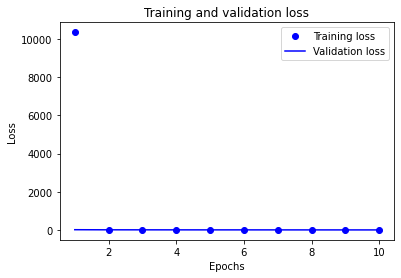

In [ ]:
# Extract the history from the model fit
history_dict = history.history

# Plot the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### FNN Model #2

In [ ]:
# Split data into training and test sets
X = data.drop(columns=["Share"])
y = data["Share"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Defining model
FNN_model_two = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compiling model
FNN_model_two.compile(loss="mean_squared_error", optimizer="adam")
history = FNN_model_two.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
296/296 [==============================] - 1s 3ms/step - loss: 367.7364 - val_loss: 0.1041
Epoch 2/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0572 - val_loss: 0.0080
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0109 - val_loss: 0.0052
Epoch 4/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 5/20
296/296 [==============================] - 1s 2ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 8/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.00

In [ ]:
test_loss = FNN_model_two.evaluate(X_test, y_test)
train_loss = FNN_model_two.evaluate(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = FNN_model_two.predict(X_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

# Calculate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Test loss: {test_loss:.3f}")
print(f"Train loss: {train_loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print("---------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 1ms/step
Test loss: 0.002
Train loss: 0.005
Accuracy: 0.997
---------------
Precision: 1.000
Recall: 0.111
F1 score: 0.200


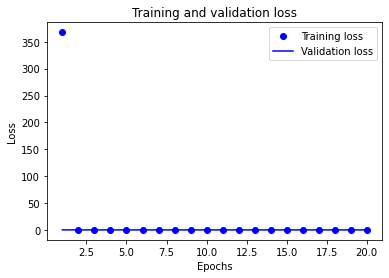

In [ ]:
# Extract the history from the model fit
history_dict = history.history

# Plot the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### FNN Final Model

In [ ]:
# Split data into training and test sets
X = data.drop(columns=["Share"])
y = data["Share"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Define the model
FNN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
# precisions = []
# recalls = []
# f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    FNN_model.compile(loss="mean_squared_error", optimizer="adam")
    history = FNN_model.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = FNN_model.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = FNN_model.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = FNN_model.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # # Calculate the precision, recall, and f1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    # precisions.append(precision)
    # recalls.append(recall)
    # f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 1.8780 - val_loss: 0.1815
Epoch 2/20
296/296 [==============================] - 2s 6ms/step - loss: 0.1502 - val_loss: 0.1001
Epoch 3/20
296/296 [==============================] - 2s 7ms/step - loss: 0.1239 - val_loss: 0.0908
Epoch 4/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0808 - val_loss: 0.0602
Epoch 5/20
296/296 [==============================] - 1s 2ms/step - loss: 0.0871 - val_loss: 0.0239
Epoch 6/20
296/296 [==============================] - 1s 5ms/step - loss: 0.1042 - val_loss: 0.0197
Epoch 7/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0358 - val_loss: 0.1009
Epoch 8/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0257 - val_loss: 0.0135
Epoch 9/20
296/296 [==============================] - 1s 2ms/step - loss: 0.0358 - val_loss: 0.0072
Epoch 10/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0371 - val_loss: 0.0305

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)

# Use the model to make predictions on the test data
y_pred = FNN_model_one.predict(X_fold_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_fold_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.3f}")
print(f"Mean train loss: {mean_train_score:.3f}")
print(f"Standard deviation: {std_dev_test:.3f}")
print(f"Mean accuracy: {mean_accuracy:.3f}")
print("--------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 1ms/step
Mean test loss: 0.003
Mean train loss: 0.003
Standard deviation: 0.002
Mean accuracy: 0.997
--------------
Precision: 0.011
Recall: 0.895
F1 score: 0.022


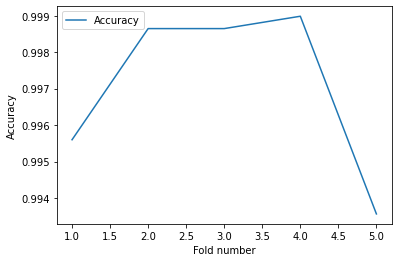

In [ ]:
# Plot the results
plt.plot(fold_numbers, accuracies, label="Accuracy")
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

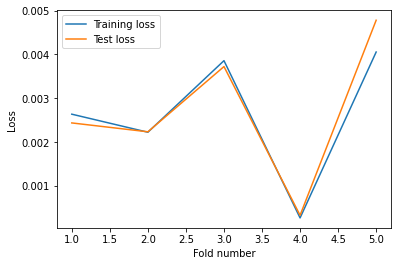

In [ ]:
# Plot the results
plt.plot(fold_numbers, train_losses, label="Training loss")
plt.plot(fold_numbers, test_losses, label="Test loss")
plt.xlabel("Fold number")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **Linear Neural Networks**

In [ ]:
# Split data into training and test sets
X = data.drop(columns=["Share"])
y = data["Share"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Pre-fine-tuning LNN models

#### LNN Model #1

In [ ]:
LNN_model_one = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="linear"),
    tf.keras.layers.Dense(32, activation="linear"),
    tf.keras.layers.Dense(16, activation="linear"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:
# Compiling model
LNN_model_one.compile(loss="mean_squared_error", optimizer="adam")
history = LNN_model_one.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
296/296 [==============================] - 1s 3ms/step - loss: 2065.4189 - val_loss: 10.1853
Epoch 2/20
296/296 [==============================] - 1s 2ms/step - loss: 8.7712 - val_loss: 7.0477
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 7.1430 - val_loss: 5.0711
Epoch 4/20
296/296 [==============================] - 1s 2ms/step - loss: 5.4908 - val_loss: 4.2642
Epoch 5/20
296/296 [==============================] - 1s 3ms/step - loss: 4.5030 - val_loss: 3.3146
Epoch 6/20
296/296 [==============================] - 1s 2ms/step - loss: 3.9138 - val_loss: 2.8138
Epoch 7/20
296/296 [==============================] - 1s 2ms/step - loss: 3.4278 - val_loss: 2.6372
Epoch 8/20
296/296 [==============================] - 1s 3ms/step - loss: 3.2413 - val_loss: 3.5950
Epoch 9/20
296/296 [==============================] - 1s 2ms/step - loss: 2.6845 - val_loss: 3.2457
Epoch 10/20
296/296 [==============================] - 1s 2ms/step - loss: 2.8655 - val_loss: 1.

In [ ]:
test_loss = LNN_model_one.evaluate(X_test, y_test)
train_loss = LNN_model_one.evaluate(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = LNN_model_one.predict(X_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

# Calculate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Test loss: {test_loss:.3f}")
print(f"Train loss: {train_loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print("---------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 1ms/step
Test loss: 0.222
Train loss: 0.229
Accuracy: 0.996
---------------
Precision: 0.429
Recall: 0.667
F1 score: 0.522


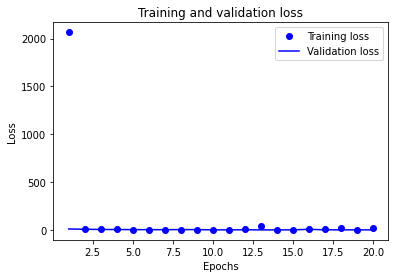

In [ ]:
# Extract the history from the model fit
history_dict = history.history

# Plot the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### LNN Model #2

In [ ]:
LNN_model_two = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="linear"),
    tf.keras.layers.Dense(32, activation="linear"),
    tf.keras.layers.Dense(16, activation="linear"),
    tf.keras.layers.Dense(8, activation="linear"),
    tf.keras.layers.Dense(4, activation="linear"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:
# Compiling model
LNN_model_two.compile(loss="mean_squared_error", optimizer="adam")
history = LNN_model_two.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
296/296 [==============================] - 1s 3ms/step - loss: 27989.1133 - val_loss: 192.9669
Epoch 2/20
296/296 [==============================] - 1s 3ms/step - loss: 98.3363 - val_loss: 49.0639
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 31.2244 - val_loss: 20.6182
Epoch 4/20
296/296 [==============================] - 1s 2ms/step - loss: 17.2937 - val_loss: 13.0248
Epoch 5/20
296/296 [==============================] - 1s 3ms/step - loss: 11.0977 - val_loss: 8.1850
Epoch 6/20
296/296 [==============================] - 1s 3ms/step - loss: 6.6634 - val_loss: 4.7234
Epoch 7/20
296/296 [==============================] - 1s 2ms/step - loss: 4.0848 - val_loss: 3.4192
Epoch 8/20
296/296 [==============================] - 1s 3ms/step - loss: 2.7004 - val_loss: 1.8460
Epoch 9/20
296/296 [==============================] - 1s 3ms/step - loss: 1.7970 - val_loss: 1.4421
Epoch 10/20
296/296 [==============================] - 1s 3ms/step - loss: 1.4099 - val

In [ ]:
test_loss = LNN_model_two.evaluate(X_test, y_test)
train_loss = LNN_model_two.evaluate(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = LNN_model_two.predict(X_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

# Calculate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Test loss: {test_loss:.3f}")
print(f"Train loss: {train_loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print("---------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 1ms/step
Test loss: 0.372
Train loss: 0.385
Accuracy: 0.614
---------------
Precision: 0.007
Recall: 0.889
F1 score: 0.014


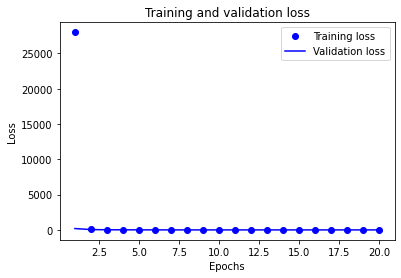

In [ ]:
# Extract the history from the model fit
history_dict = history.history

# Plot the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Final LNN Model

In [ ]:
LNN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation="linear"),
    tf.keras.layers.Dense(32, activation="linear"),
    tf.keras.layers.Dense(16, activation="linear"),
    tf.keras.layers.Dense(8, activation="linear"),
    tf.keras.layers.Dense(4, activation="linear"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
precisions = []
recalls = []
f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    LNN_model.compile(loss="mean_squared_error", optimizer="adam")
    history = LNN_model.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = LNN_model.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = LNN_model.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = LNN_model.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # Calculate the precision, recall, and f1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 1s 3ms/step - loss: 2879.5229 - val_loss: 8.6732
Epoch 2/20
296/296 [==============================] - 1s 3ms/step - loss: 4.4971 - val_loss: 2.6131
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 2.4742 - val_loss: 2.0969
Epoch 4/20
296/296 [==============================] - 1s 3ms/step - loss: 2.0510 - val_loss: 1.7837
Epoch 5/20
296/296 [==============================] - 1s 2ms/step - loss: 1.6859 - val_loss: 1.7842
Epoch 6/20
296/296 [==============================] - 1s 2ms/step - loss: 1.4243 - val_loss: 1.1225
Epoch 7/20
296/296 [==============================] - 1s 3ms/step - loss: 1.1745 - val_loss: 1.2728
Epoch 8/20
296/296 [==============================] - 2s 5ms/step - loss: 1.0056 - val_loss: 1.2919
Epoch 9/20
296/296 [==============================] - 1s 3ms/step - loss: 0.8236 - val_loss: 0.5945
Epoch 10/20
296/296 [==============================] - 1s 2ms/step - loss: 0.6494 - val_loss: 0.8

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1s)

# Use the model to make predictions on the test data
y_pred = FNN_model_one.predict(X_fold_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_fold_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.3f}")
print(f"Mean train loss: {mean_train_score:.3f}")
print(f"Standard deviation: {std_dev_test:.3f}")
print(f"Mean accuracy: {mean_accuracy:.3f}")
print("--------------")
print(f"Mean precision: {mean_precision:.3f}")
print(f"Mean recall: {mean_recall:.3f}")
print(f"Mean f1: {mean_f1:.3f}")

93/93 [==============================] - 0s 1ms/step
Mean test loss: 0.408
Mean train loss: 0.409
Standard deviation: 0.782
Mean accuracy: 0.805
--------------
Mean precision: 0.595
Mean recall: 0.790
Mean f1: 0.641


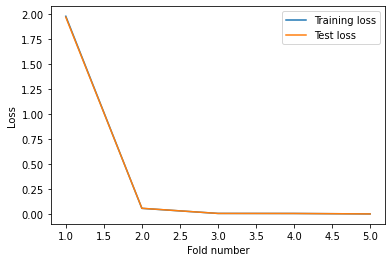

In [ ]:
#Training and Test loss
plt.plot(fold_numbers, train_losses, label="Training loss")
plt.plot(fold_numbers, test_losses, label="Test loss")
plt.xlabel("Fold number")
plt.ylabel("Loss")
plt.legend()
plt.show()

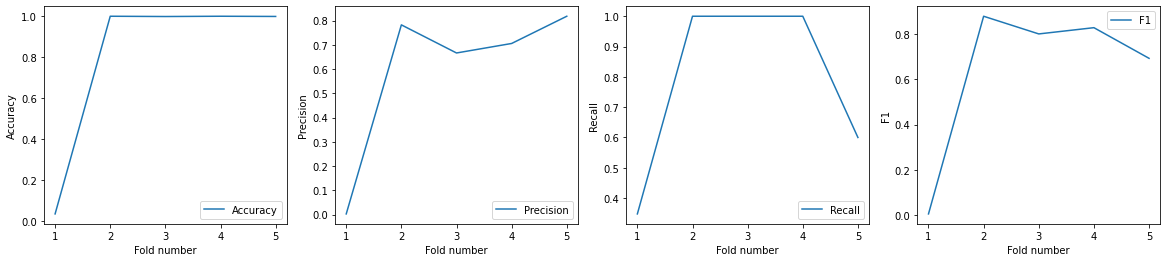

In [ ]:
# Import pyplot from matplotlib
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

# Accuracy
ax1.plot(fold_numbers, accuracies, label="Accuracy")
ax1.set_xlabel("Fold number")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Precision
ax2.plot(fold_numbers, precisions, label="Precision")
ax2.set_xlabel("Fold number")
ax2.set_ylabel("Precision")
ax2.legend()

# Plot Recall on the second subplot
ax3.plot(fold_numbers, recalls, label="Recall")
ax3.set_xlabel("Fold number")
ax3.set_ylabel("Recall")
ax3.legend()

# Plot F1 on the first subplot
ax4.plot(fold_numbers, f1s, label="F1")
ax4.set_xlabel("Fold number")
ax4.set_ylabel("F1")
ax4.legend()

# Show the plot
plt.show()


## **Convolutional Neural Network**

In [ ]:
# Split data into training and test sets
X = data.drop(columns=["Share"])
y = data["Share"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Reshape the input data into a 3D tensor
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

### Pre-fine-tuning CNN models

#### CNN Model #1

In [ ]:
CNN_model_one = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compiling model
CNN_model_one.compile(loss="mean_squared_error", optimizer="adam")
history = CNN_model_one.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 2.8362 - val_loss: 0.1485
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1486 - val_loss: 0.0365
Epoch 3/20
296/296 [==============================] - 1s 4ms/step - loss: 0.2722 - val_loss: 0.0296
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1125 - val_loss: 0.0222
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0929 - val_loss: 0.0208
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.3317 - val_loss: 0.0239
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0225 - val_loss: 0.0115
Epoch 8/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0368 - val_loss: 0.0263
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0823 - val_loss: 0.1445
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0490 - val_loss: 0.0200

In [ ]:
test_loss = CNN_model_one.evaluate(X_test, y_test)
train_loss = CNN_model_one.evaluate(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = CNN_model_one.predict(X_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

# Calculate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Test loss: {test_loss:.3f}")
print(f"Train loss: {train_loss:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print("---------------")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 2ms/step
Test loss: 0.015
Train loss: 0.014
Accuracy: 0.994
---------------
Precision: 0.543
Recall: 0.950
F1 score: 0.691


#### CNN Model #2

In [ ]:
CNN_model_two = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
# precisions = []
# recalls = []
# f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    CNN_model_two.compile(loss="mean_squared_error", optimizer="adam")
    history = CNN_model_two.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = CNN_model_two.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = CNN_model_two.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = CNN_model_two.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # # Calculate the precision, recall, and f1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    # precisions.append(precision)
    # recalls.append(recall)
    # f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 43.1211 - val_loss: 0.1415
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1110 - val_loss: 0.1463
Epoch 3/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1495 - val_loss: 0.0478
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1155 - val_loss: 0.0254
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0823 - val_loss: 0.1084
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.2092 - val_loss: 0.0198
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.5622 - val_loss: 0.1196
Epoch 8/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1721 - val_loss: 0.0435
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1208 - val_loss: 0.0515
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1715 - val_loss: 0.365

In [ ]:
# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)
# mean_precision = np.mean(precisions)
# mean_recall = np.mean(recalls)
# mean_f1 = np.mean(f1s)

# Use the model to make predictions on the test data
y_pred = CNN_model_two.predict(X_fold_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_fold_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.4f}")
print(f"Mean train loss: {mean_train_score:.4f}")
print(f"Standard deviation: {std_dev_test:.4f}")
print(f"Mean accuracy: {mean_accuracy:.4f}")
print("--------------")
print(f"Mean precision: {mean_precision:.4f}")
print(f"Mean recall: {mean_recall:.4f}")
print(f"Mean f1: {mean_f1:.4f}")

93/93 [==============================] - 0s 3ms/step
Mean test loss: 0.0018
Mean train loss: 0.0019
Standard deviation: 0.0014
Mean accuracy: 0.9980
--------------
Mean precision: 0.4000
Mean recall: 0.3250
Mean f1: 0.3538


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CNN Model #3

In [ ]:
CNN_model_three = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
# precisions = []
# recalls = []
# f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    CNN_model_three.compile(loss="mean_squared_error", optimizer="adam")
    history = CNN_model_three.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = CNN_model_three.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = CNN_model_three.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = CNN_model_three.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # # Calculate the precision, recall, and f1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    # precisions.append(precision)
    # recalls.append(recall)
    # f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 3s 6ms/step - loss: 7.3170 - val_loss: 0.0268
Epoch 2/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0201 - val_loss: 0.0128
Epoch 3/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0130 - val_loss: 0.0091
Epoch 4/20
296/296 [==============================] - 3s 9ms/step - loss: 0.0101 - val_loss: 0.0051
Epoch 5/20
296/296 [==============================] - 2s 6ms/step - loss: 0.0079 - val_loss: 0.0102
Epoch 6/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0089 - val_loss: 0.0048
Epoch 7/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0081 - val_loss: 0.0031
Epoch 8/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0155 - val_loss: 0.0122
Epoch 9/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0114 - val_loss: 0.0084
Epoch 10/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0110 - val_loss: 0.0026

In [ ]:
# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)
# mean_precision = np.mean(precisions)
# mean_recall = np.mean(recalls)
# mean_f1 = np.mean(f1s)

# Use the model to make predictions on the test data
y_pred = CNN_model_three.predict(X_fold_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_fold_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.4f}")
print(f"Mean train loss: {mean_train_score:.4f}")
print(f"Standard deviation: {std_dev_test:.4f}")
print(f"Mean accuracy: {mean_accuracy:.4f}")
print("--------------")
print(f"precision: {mean_precision:.4f}")
print(f"recall: {mean_recall:.4f}")
print(f"f1: {mean_f1:.4f}")

93/93 [==============================] - 0s 2ms/step
Mean test loss: 0.0018
Mean train loss: 0.0019
Standard deviation: 0.0014
Mean accuracy: 0.9980
--------------
precision: 0.4000
recall: 0.3250
f1: 0.3538


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Final CNN Model

In [ ]:
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
# precisions = []
# recalls = []
# f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    CNN_model.compile(loss="mean_squared_error", optimizer="adam")
    history = CNN_model.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = CNN_model.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = CNN_model.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = CNN_model.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # # Calculate the precision, recall, and f1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    # precisions.append(precision)
    # recalls.append(recall)
    # f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 2s 5ms/step - loss: 1.4724 - val_loss: 0.0363
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0195 - val_loss: 0.0087
Epoch 3/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0080 - val_loss: 0.0066
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0032
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0047 - val_loss: 0.0113
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0270
Epoch 8/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0092 - val_loss: 0.1851
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0231 - val_loss: 0.0033
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0165

In [ ]:
# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)

# Use the model to make predictions on the test data
y_pred = CNN_model.predict(X_fold_test)

# Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_fold_test > threshold).astype(int)

# Calculate the precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.3f}")
print(f"Mean train loss: {mean_train_score:.3f}")
print(f"Standard deviation: {std_dev_test:.3f}")
print(f"Mean accuracy: {mean_accuracy:.3f}")
# print("--------------")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")
# print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 4ms/step
Mean test loss: 0.003
Mean train loss: 0.003
Standard deviation: 0.002
Mean accuracy: 0.995


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


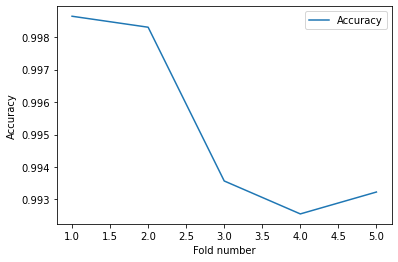

In [ ]:
# Plot the results
plt.plot(fold_numbers, accuracies, label="Accuracy")
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

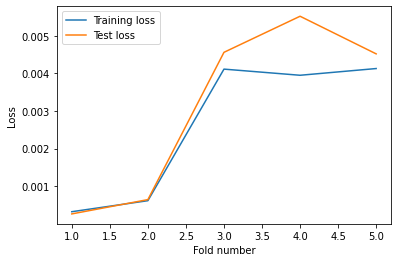

In [ ]:
#Training and Test loss
plt.plot(fold_numbers, train_losses, label="Training loss")
plt.plot(fold_numbers, test_losses, label="Test loss")
plt.xlabel("Fold number")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **Multilayer Perceptrons**

In [ ]:
# Split data into training and test sets
X = data.drop(columns=["Share"])
y = data["Share"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# # Reshape the input data into a 3D tensor
# X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
# X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

In [ ]:
# Create the MLP model with a convolutional layer and a max pooling layer
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
n_folds = 5 # Number of folds for cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True) # Create a KFold object

fold_numbers = [] # the current number of fold
train_losses = [] # Initialize list to store train cross-validation scores
test_losses = [] # Initialize list to store test cross-validation scores
accuracies = []
precisions = []
recalls = []
f1s = []

In [ ]:
# Iterate over the folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Extract the training and test data for this fold
    X_fold_train, X_fold_test = X.iloc[train_index], X.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Compile + fit model
    MLP_model.compile(loss="mean_squared_error", optimizer="adam")
    history = MLP_model.fit(X_fold_train, y_fold_train, epochs=20, batch_size=32, validation_split=0.2)
    
    # Evaluate model on the test data for this fold
    test_score = MLP_model.evaluate(X_fold_test, y_fold_test)
    test_losses.append(test_score)

    # Evaluate model on the train data for this fold
    train_score = MLP_model.evaluate(X_fold_train, y_fold_train)
    train_losses.append(train_score)

    # Use the model to make predictions on the test data
    y_pred = MLP_model.predict(X_fold_test)

    # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)
    y_test_binary = (y_fold_test > threshold).astype(int)

    # # Calculate the precision, recall, and f1 score
    # precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
    # precisions.append(precision)
    # recalls.append(recall)
    # f1s.append(f1)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    accuracies.append(accuracy)
    
    # Store the fold number
    fold_numbers.append(i+1)

Epoch 1/20
296/296 [==============================] - 1s 3ms/step - loss: 55.2560 - val_loss: 1.1337
Epoch 2/20
296/296 [==============================] - 1s 3ms/step - loss: 0.8075 - val_loss: 0.5302
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 0.4683 - val_loss: 0.3500
Epoch 4/20
296/296 [==============================] - 1s 3ms/step - loss: 0.3067 - val_loss: 0.2128
Epoch 5/20
296/296 [==============================] - 1s 3ms/step - loss: 0.2145 - val_loss: 0.2108
Epoch 6/20
296/296 [==============================] - 1s 2ms/step - loss: 0.1664 - val_loss: 0.1749
Epoch 7/20
296/296 [==============================] - 1s 2ms/step - loss: 0.1347 - val_loss: 0.1497
Epoch 8/20
296/296 [==============================] - 1s 2ms/step - loss: 0.1270 - val_loss: 0.0870
Epoch 9/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0900 - val_loss: 0.1160
Epoch 10/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0792 - val_loss: 0.061

In [ ]:
# Mean and standard deviation of the cross-validation scores
mean_test_score = np.mean(test_losses)
mean_train_score = np.mean(train_losses)
std_dev_test = np.std(test_losses)
mean_accuracy = np.mean(accuracies)

# Use the model to make predictions on the test data
y_pred = MLP_model.predict(X_fold_test)

# # Convert the predictions and true labels to binary labels (0 or 1) based on a threshold
# threshold = 0.5
# y_pred_binary = (y_pred > threshold).astype(int)
# y_test_binary = (y_fold_test > threshold).astype(int)

# # Calculate the precision, recall, and f1 score
# precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')

print(f"Mean test loss: {mean_test_score:.3f}")
print(f"Mean train loss: {mean_train_score:.3f}")
print(f"Standard deviation: {std_dev_test:.3f}")
print(f"Mean accuracy: {mean_accuracy:.3f}")
# # print("--------------")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")
# print(f"F1 score: {f1:.3f}")

93/93 [==============================] - 0s 2ms/step
Mean test loss: 0.014
Mean train loss: 0.014
Standard deviation: 0.012
Mean accuracy: 0.992


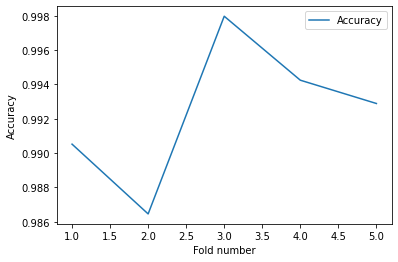

In [ ]:
# Plot the results
plt.plot(fold_numbers, accuracies, label="Accuracy")
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

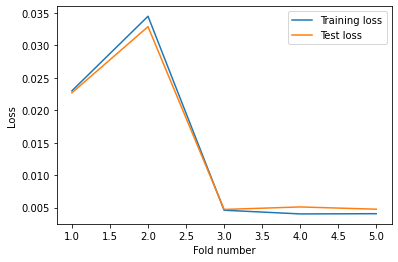

In [ ]:
# Plot the results
plt.plot(fold_numbers, train_losses, label="Training loss")
plt.plot(fold_numbers, test_losses, label="Test loss")
plt.xlabel("Fold number")
plt.ylabel("Loss")
plt.legend()
plt.show()